In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error as mae

In [5]:
df=pd.read_csv('data_cleaned.csv')
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [12]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [23]:
from sklearn.preprocessing import MinMaxScaler 
scaled=MinMaxScaler()
scaled_x=scaled.fit_transform(x)
x=pd.DataFrame(scaled_x,columns=x.columns)

In [77]:
from sklearn.model_selection import train_test_split as tt
train_x,test_x,train_y,test_y=tt(x,y,stratify=y,random_state=56)
from sklearn.metrics import f1_score as ff

In [33]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(train_x,train_y)
predict=logreg.predict(train_x)
score=ff(predict,train_y)
score

0.7622950819672131

In [32]:
logreg.fit(test_x,test_y)
predict1=logreg.predict(test_x)
score=ff(predict1,test_y)
score

0.7453416149068322

In [46]:
z=logreg.predict_proba(test_x)
z

array([[0.86802223, 0.13197777],
       [0.8738864 , 0.1261136 ],
       [0.13329046, 0.86670954],
       [0.88653732, 0.11346268],
       [0.70203686, 0.29796314],
       [0.09532813, 0.90467187],
       [0.38120285, 0.61879715],
       [0.95872162, 0.04127838],
       [0.78260767, 0.21739233],
       [0.88967628, 0.11032372],
       [0.9113249 , 0.0886751 ],
       [0.07575955, 0.92424045],
       [0.47961788, 0.52038212],
       [0.88675192, 0.11324808],
       [0.5824931 , 0.4175069 ],
       [0.61568817, 0.38431183],
       [0.78228794, 0.21771206],
       [0.88970855, 0.11029145],
       [0.23444679, 0.76555321],
       [0.71113572, 0.28886428],
       [0.57183954, 0.42816046],
       [0.17050088, 0.82949912],
       [0.91326815, 0.08673185],
       [0.4185549 , 0.5814451 ],
       [0.58424783, 0.41575217],
       [0.7534036 , 0.2465964 ],
       [0.52106054, 0.47893946],
       [0.51436979, 0.48563021],
       [0.91324292, 0.08675708],
       [0.0664228 , 0.9335772 ],
       [0.

In [47]:
za=z[:,1]
for i in range(len(z)):
    if za[i]>0.55:
        za[i]=1
    else:
        za[i]=0
               

        
               

In [49]:
score=ff(za,test_y)
score

0.7080745341614907

In [61]:
q=logreg.coef_.reshape(-1)
q

array([-2.19259829,  0.25268099,  0.96879959,  0.05563245, -1.02310216,
        1.31855698, -1.3172271 ,  0.76129618,  0.96912816,  0.50707146,
       -0.65721065, -0.37710323, -0.47877888, -0.72307315,  0.17856381,
        0.51106564,  0.09282955,  0.18462437, -0.54110337, -0.02957628,
       -0.39507385,  0.02128472,  0.22521158, -0.24516643])

In [63]:
q=logreg.coef_.reshape(-1)
q

array([-2.19259829,  0.25268099,  0.96879959,  0.05563245, -1.02310216,
        1.31855698, -1.3172271 ,  0.76129618,  0.96912816,  0.50707146,
       -0.65721065, -0.37710323, -0.47877888, -0.72307315,  0.17856381,
        0.51106564,  0.09282955,  0.18462437, -0.54110337, -0.02957628,
       -0.39507385,  0.02128472,  0.22521158, -0.24516643])

<BarContainer object of 24 artists>

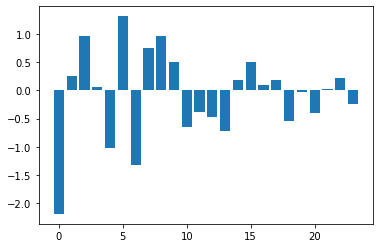

In [65]:
plt.bar(range(len(train_x.columns)),q)

In [67]:
coef=pd.DataFrame({'columns':train_x.columns,'coefficient':logreg.coef_.reshape(-1)})
coef

,columns,coefficient
0,Age,-2.192598
1,Fare,0.252681
2,Pclass_1,0.968800
3,Pclass_2,0.055632
4,Pclass_3,-1.023102
5,Sex_female,1.318557
6,Sex_male,-1.317227
7,SibSp_0,0.761296
8,SibSp_1,0.969128
9,SibSp_2,0.507071


In [110]:
coef_new=coef[coef['coefficient']>0.3]

In [111]:
subset=df[coef_new['columns'].values]

In [112]:
from sklearn.model_selection import train_test_split as tt
train_x,test_x,train_y,test_y=tt(subset,y,stratify=y,random_state=56)

In [113]:
from sklearn.linear_model import LogisticRegression 
l=LogisticRegression()
l.fit(train_x,train_y)
predict=l.predict(train_x)
score=ff(predict,train_y)
score
m=l.coef_.reshape(-1)

<BarContainer object of 6 artists>

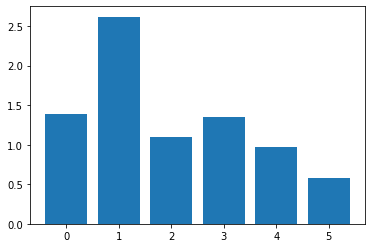

In [115]:
plt.bar(range(len(train_x.columns)),m)

In [ ]:
df=pd.read_csv('')